In [1]:
from PySDM_examples.Lowe_et_al_2019 import Settings, Simulation
from PySDM_examples.Lowe_et_al_2019.aerosol import AerosolMarine, AerosolBoreal

#!pip install -e ~/Research/PySDM
import PySDM
print(PySDM.__file__)
from PySDM.initialisation.sampling import spectral_sampling as spec_sampling
from PySDM.physics import si

import numpy as np
import os
from matplotlib import pyplot
import matplotlib
from joblib import Parallel, delayed, parallel_backend
import numba

/Users/claresinger/Research/PySDM/PySDM/__init__.py


In [2]:
numba.config.NUMBA_NUM_THREADS=1
rtol_x = 1e-3
rtol_thd = 1e-3

In [3]:
CI = 'CI' in os.environ

updraft_list = np.geomspace(0.1, 10, 1)
forg_list = np.linspace(0.1, 0.9, 1)

subplot_list = ["b"]
models = ('bulk', 'film')

Acc = {"a": 30, "b": 134, "c": 160, "d": 540}

In [4]:
def compute(key, settings):
    settings.output_interval = 1.0 * si.s
    settings.rtol_x = rtol_x
    settings.rtol_thd = rtol_thd
    simulation = Simulation(settings)
    output = simulation.run()
    output['updraft'] = settings.w
    output['org_fraction'] = settings.aerosol.aerosol_modes_per_cc[0]['f_org']
    output['color'] = settings.aerosol.color
    return key, output

print(f'tasks scheduled: {len(models) * len(subplot_list) * len(forg_list) * len(updraft_list)}')
with parallel_backend('loky', n_jobs=-1):
    output = dict(Parallel(verbose=10)(
        delayed(compute)(subplot+f"_w{w:.2f}_f{Forg:.2f}_"+model, Settings(
            dt = 1.0 * si.s, 
            n_sd_per_mode = 100, 
            model = model,
            aerosol = {
                "a": AerosolMarine(Acc_Forg=Forg, Acc_N2=Acc["a"]), 
                "b": AerosolMarine(Acc_Forg=Forg, Acc_N2=Acc["b"]), 
                "c": AerosolBoreal(Acc_Forg=Forg, Acc_N2=Acc["c"]), 
                "d": AerosolBoreal(Acc_Forg=Forg, Acc_N2=Acc["d"])
            }[subplot],
            w = w * si.m / si.s,
            spectral_sampling = spec_sampling.ConstantMultiplicity
        ))
        for w in updraft_list
        for Forg in forg_list
        for subplot in subplot_list
        for model in models
    ))

tasks scheduled: 2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


7.074155081793125e-09 9.709401083730482e-07 7.100253577078537e-12
9.69565444191995e-09 1.3098912200700817e-06 9.421650846959311e-12
1.1401088500435437e-08 1.5247520691575724e-06 1.0854113864745704e-11
1.2772176300551983e-08 1.6943704806447698e-06 1.1964273136477152e-11
1.3960753326257162e-08 1.839216347370082e-06 1.2898215496996843e-11
1.5032381207034438e-08 1.968100270838081e-06 1.3718559611398015e-11
1.6022133047481076e-08 2.085723614757685e-06 1.4458614532836722e-11
1.69512608709837e-08 2.1949283761963286e-06 1.5138463029452952e-11
1.783375241332846e-08 2.29758057442615e-06 1.577126022630446e-11
1.8679377424737008e-08 2.394980064152775e-06 1.6366149522608153e-11
1.9495273658127747e-08 2.488073629795251e-06 1.692977611815229e-11
2.0286844163974218e-08 2.577575420324872e-06 1.7467141112627345e-11
2.10582985158711e-08 2.664039524581303e-06 1.7982115496904896e-11
2.181299626490484e-08 2.7479059870795294e-06 1.8477765647369674e-11
2.2553674102342928e-08 2.8295312180419715e-06 1.895656819

[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   27.2s finished


4.5748976062677286e-07 1.680971928653749e-05 6.905571384091322e-11
4.6627115194381054e-07 1.689122293642508e-05 6.923442187183126e-11
4.754617689470114e-07 1.6974103089839373e-05 6.941532535471843e-11
4.850943608476887e-07 1.705842475804974e-05 6.959852968584223e-11
4.952366418135495e-07 1.714451877313375e-05 6.978471094581541e-11
5.059395320441215e-07 1.7232517382340716e-05 6.997410498118887e-11
5.172723046611117e-07 1.7322652399761714e-05 7.016715441191275e-11
5.293175508989244e-07 1.741519356325457e-05 7.036437207907564e-11
5.421748124409534e-07 1.7510457989080132e-05 7.056635857940051e-11
5.5596553639539e-07 1.7608822804640432e-05 7.077382566699116e-11
5.708399744000961e-07 1.7710742355794876e-05 7.098762809307521e-11
5.869870161790375e-07 1.781677216616855e-05 7.120880788817143e-11
6.046485895928895e-07 1.7927603154295002e-05 7.143865752743528e-11
6.241414238202704e-07 1.804411196747675e-05 7.167881273068616e-11
6.458911928148954e-07 1.816743766134622e-05 7.19313936451512e-11
6.70

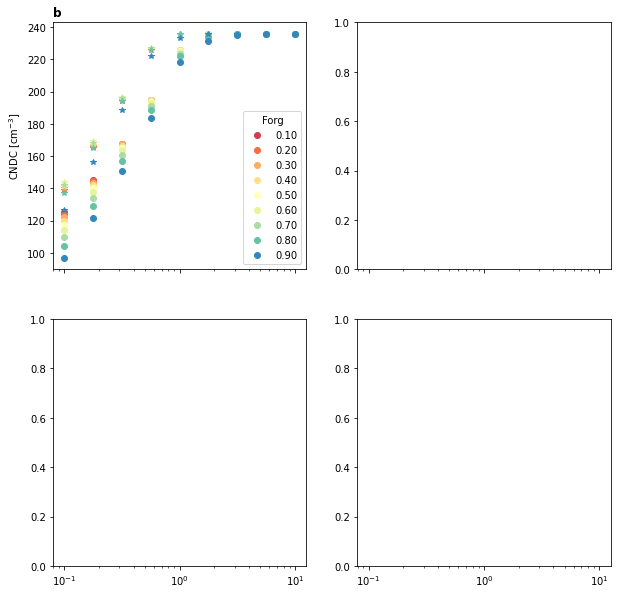

In [10]:
fig,axes = pyplot.subplots(2,2,figsize=(10,10),sharex=True,sharey=False)

f0 = open("testPySDM_Marine_0.txt","w")
f1 = open("testPySDM_Marine_1.txt","w")

f0.write("parcel disp = 200.00 \n")
f0.write("updraft (m/s), forg, CDNC (cm-3) \n")
f1.write("parcel disp = 200.00 \n")
f1.write("updraft (m/s), forg, CDNC (cm-3) \n")

for k,subplot in enumerate(subplot_list):
    for i,w in enumerate(updraft_list):
        for j,Forg in enumerate(forg_list):
                key = subplot+"_w{:.2f}_f{:.2f}_".format(w,Forg)
                var = 'n_c_cm3'
                z = np.array(output[key+"film"]['z'])
                CDNC_film = np.array(output[key+"film"][var])
                CDNC_bulk = np.array(output[key+"bulk"][var])
                
                ax = axes.flatten()[k]
                ax.set_title(subplot, loc="left", weight="bold")
                
                cmap = matplotlib.cm.get_cmap('Spectral')
                if i == 0:
                    ax.plot(w, CDNC_bulk[-1], 'o', color=cmap(Forg), label="{:.2f}".format(Forg))
                    ax.plot(w, CDNC_film[-1], '*', color=cmap(Forg))
                else:
                    ax.plot(w, CDNC_bulk[-1], 'o', color=cmap(Forg))
                    ax.plot(w, CDNC_film[-1], '*', color=cmap(Forg))
                
                if subplot == "b":
                    f0.write("{:.2e}, {:.2f}, {:.2f} \n".format(w, Forg, CDNC_bulk[-1]))
                    f1.write("{:.2e}, {:.2f}, {:.2f} \n".format(w, Forg, CDNC_film[-1]))
                
                ax.set_xscale("log")
                if k == 0:
                    ax.legend(title="Forg")
                    ax.set_ylabel("CNDC [cm$^{-3}$]")
                if k == 2:
                    ax.set_ylabel("CNDC [cm$^{-3}$]")
                if k > 1:
                    ax.set_xlabel("updraft velocity [m/s]")
                
pyplot.show()

f0.close()
f1.close()